Part 1: 

●	Load the data using Python Pandas library.

●	Do Exploratory Data Analysis of the data and state your insights.

Part 2: 

●	Perform and state all the inference from the assumption techniques.

●	Build the base model and state the inference.

●	Select best features and build your best model using most important features according to your inference.

●	Provide the inferences for various methods.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
# Load the data using Python Pandas library.
df = pd.read_csv('mtcars2.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
#  Do Exploratory Data Analysis of the data and state your insights.
df.shape

(32, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [9]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


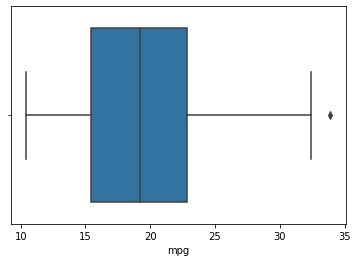

In [10]:
sns.boxplot('mpg',data=df)

In [62]:
# Perform and state all the inference from the assumption techniques.
# Build the base model and state the inference.
# Provide the inferences for various methods.

# Assumption-1 Normality of residuals

y = df['mpg']
x = df.drop(['mpg','model'], axis=1)
xc = sm.add_constant(x)
model = sm.OLS(y, xc)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.79e-07
Time:                        22:36:24   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

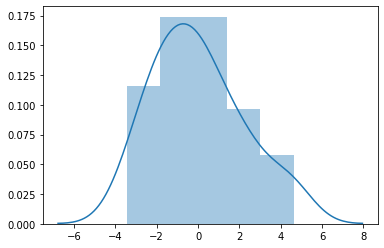

In [63]:
res = result.resid
sns.distplot(res)

In [64]:
res.mean()

2.0128343436454088e-13

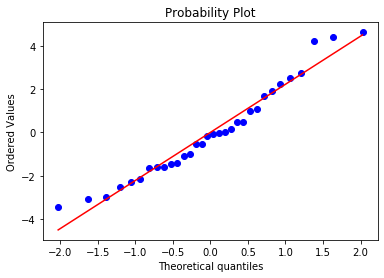

In [65]:
stats.probplot(res, plot=plt)
plt.show()

Inference: QQ plot shows that residuals are close to normality around the distribution.

In [66]:
print(stats.jarque_bera(res))

(1.7466576018548141, 0.4175592615519029)


In [67]:
# Assumption-2 Multicollinearity
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


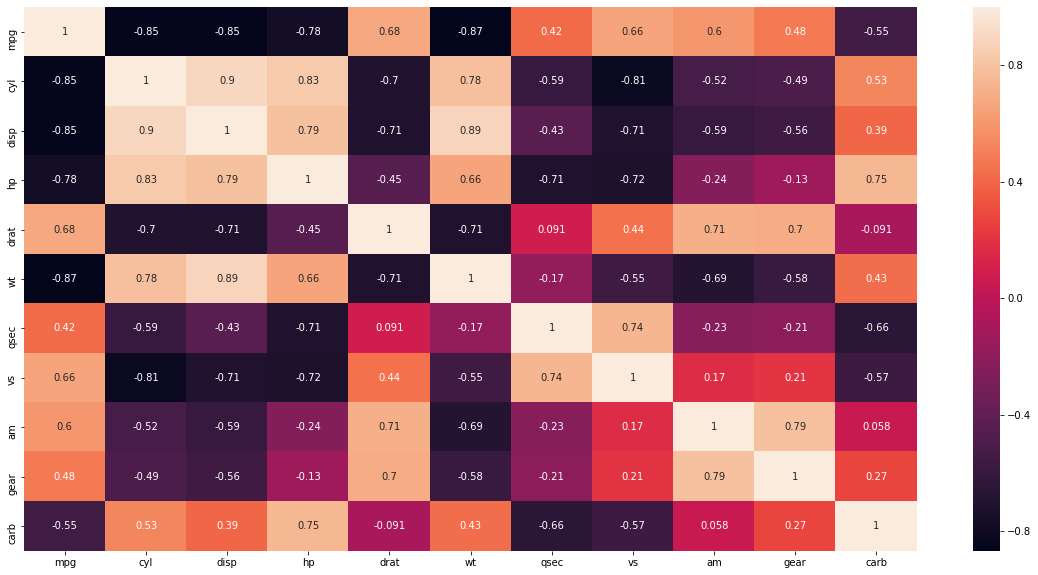

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [70]:
y = df['mpg']
x = df.drop(['mpg','model','qsec','gear','wt','drat','cyl','hp'],axis=1)
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
pd.DataFrame({'vif':vif},index=x.columns)

,vif
disp,4.607189
vs,1.449475
am,2.139760
carb,5.884330


Inference: The columns vs, am, carb and disp have been filtered that have low VIF and significant in the regression model

In [74]:
# Assumption-3 Homoscedsticity(Constant variance of residuals)
y = df['mpg']
x = df.drop(['mpg','model'],axis=1)
xc = sm.add_constant(x)
lin_reg = sm.OLS(y,xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.79e-07
Time:                        23:05:09   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

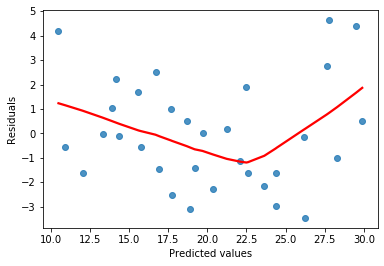

In [75]:
res = result.resid
y_pred = result.predict(xc)
sns.regplot(x=y_pred, y=res, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [77]:
name = ['F statistic','p-value']
test = sms.het_goldfeldquandt(y=res, x=xc)
test

(28.863993040889845, 0.0010748981447214767, 'increasing')

Inference: The data shows Heteroscedaticity

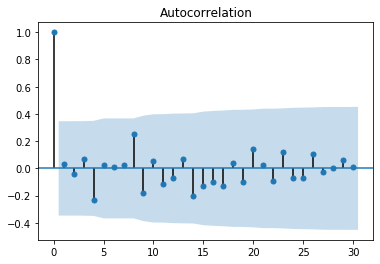

In [78]:
# Assumption-4 Auto-correlation
acf = smt.graphics.plot_acf(res,lags=30)
acf.show()

Inference: The plot shows mild to high correlation with errors of lag 1. The DW statistics at 1.992 also shows the almost high +ve Autocorrelation.

In [79]:
# Assumption-5 Linearity of Relationship

y = df['mpg']
x = df.drop(['mpg','model'],axis=1)
xc = sm.add_constant(x)
lin_reg = sm.OLS(y,xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.79e-07
Time:                        23:23:29   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

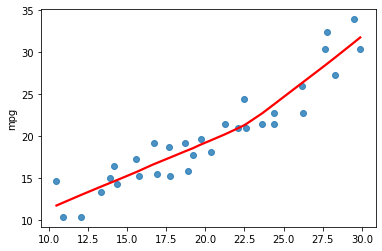

In [81]:
y_pred = result.predict(xc)
sns.regplot(x=y_pred, y=y, lowess=True, line_kws={'color':'red'})
plt.show()

Inference: The plot signifies a fairly linear relationship in the model. All the data points approximately align to the predictor line.

In [90]:
# Select best features and build your best model using most important features according to your inference.

In [85]:
cols = x.columns.to_list()
pmax = 1

while len(cols)>0 :
    X_1 = x[cols]
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values, index=cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    if pmax>0.05 :
        cols.remove(feature_max_p)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['wt', 'qsec', 'am']


In [86]:
x = x[selected_features_BE]
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              741.0
Date:                Tue, 22 Oct 2019   Prob (F-statistic):                    1.71e-27
Time:                        23:33:35   Log-Likelihood:                         -73.115
No. Observations:                  32   AIC:                                      152.2
Df Residuals:                      29   BIC:                                      156.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = sm.OLS(y_train, x_train).fit()
print(model.rsquared)

0.9867884162641763


In [89]:
y_pred = model.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("RMSE: ", np.sqrt(mse))

R2 Score:  0.837865286044295
RMSE:  2.347408486388764
